# Study ARMA on synthetic data

## Takeaways
Not the best tool, since it always seems to look for seasonality.

## Helper functions

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [6]:
def fuzz(d):
    std = np.std(d)
    return d + np.random.uniform(-std/5.0, std/5.0, size=d.size)
fuzz(np.arange(10))

array([-0.36335427,  1.35450271,  2.08481942,  2.54913297,  4.12154186,
        5.21892064,  5.78538638,  7.23971289,  8.4600295 ,  8.74462627])

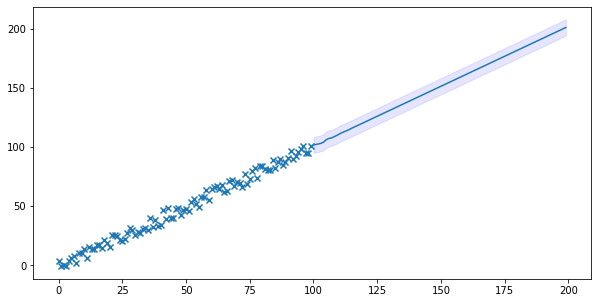

In [66]:

from statsmodels.tsa.arima_model import ARIMA

def study_prophet(y, show_components=False):
    arima = ARIMA(y, order=(8,1,1))
    model_fit = arima.fit()
    x = np.arange(y.size * 2)
    plt.figure(figsize=(10, 5))
    plt.scatter(x[:y.size], y, marker='x')
    pred, stderr, conf_int = model_fit.forecast(y.size)
    plt.plot(x[y.size:], pred)
    
    plt.fill_between(x[y.size:], conf_int[:, 0], conf_int[:, 1],
                         alpha=0.1, color='b')
    plt.show()
    return pred
study_prophet(fuzz(np.arange(0, 100)));

In [9]:
date_range = pd.date_range(start='1/1/2018', periods=300, freq='1D')

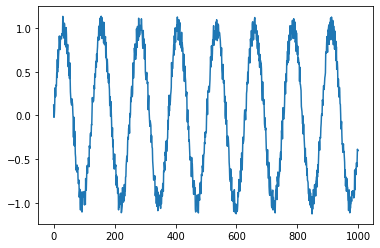

In [49]:
plt.plot(fuzz(np.sin(np.arange(0, 50, .05))))

## Studies

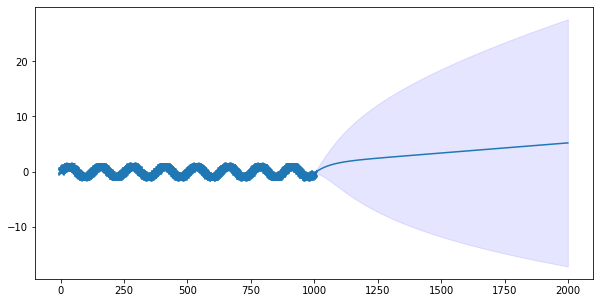

In [67]:
# Sine wave.
study_prophet(fuzz(np.sin(np.arange(0, 50, .05))));

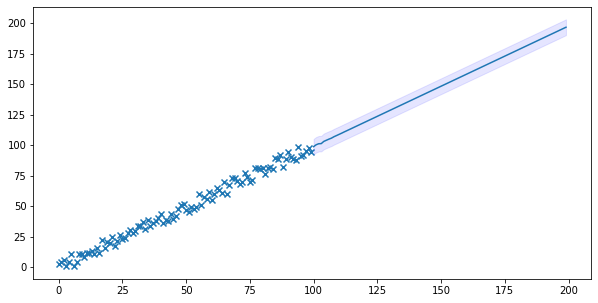

In [59]:
# Strong Trend with random noise.
study_prophet(fuzz(np.arange(100)));

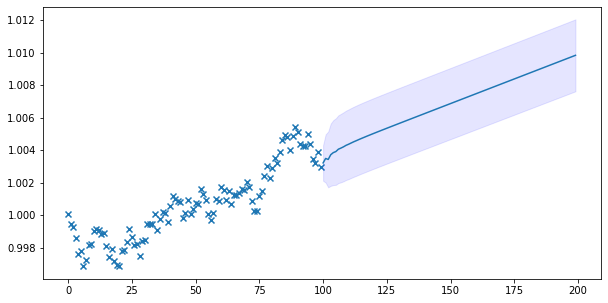

array([1.00322142, 1.00349711, 1.00343398, 1.00372737, 1.00385577,
       1.0039203 , 1.00406637, 1.00413503, 1.00421194, 1.00430388,
       1.00437127, 1.00444728, 1.00452169, 1.00458877, 1.00465855,
       1.00472551, 1.00479055, 1.00485596, 1.00491985, 1.00498321,
       1.00504635, 1.00510879, 1.005171  , 1.00523296, 1.0052946 ,
       1.0053561 , 1.00541743, 1.00547862, 1.00553972, 1.00560071,
       1.00566164, 1.00572251, 1.00578332, 1.00584409, 1.00590484,
       1.00596555, 1.00602624, 1.00608691, 1.00614756, 1.00620821,
       1.00626884, 1.00632946, 1.00639008, 1.00645069, 1.00651129,
       1.00657189, 1.00663249, 1.00669309, 1.00675368, 1.00681427,
       1.00687486, 1.00693545, 1.00699604, 1.00705662, 1.00711721,
       1.00717779, 1.00723838, 1.00729896, 1.00735955, 1.00742013,
       1.00748071, 1.0075413 , 1.00760188, 1.00766246, 1.00772305,
       1.00778363, 1.00784421, 1.00790479, 1.00796538, 1.00802596,
       1.00808654, 1.00814712, 1.00820771, 1.00826829, 1.00832

In [60]:
# Random walk with a very slight uptrend.
study_prophet((1+np.random.uniform(-.001, .00101, size=100)).cumprod(), show_components=True)

In [30]:
# Generate a momentum/mean reverting series with moving average.
import statsmodels.tsa.arima_process
def gen_series(arparams, maparams, size):
    ar = np.r_[1, -arparams] # add zero-lag and negate
    ma = np.r_[1, maparams] # add zero-lag
    d = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, size)
    return d


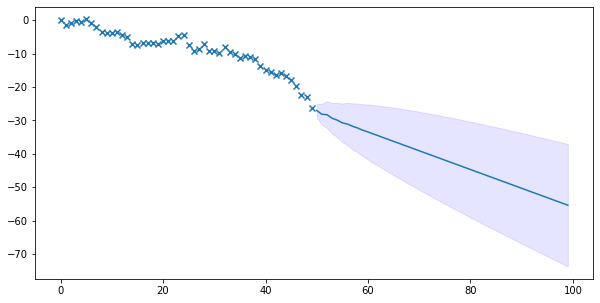

array([-27.03160424, -28.16948807, -28.28972827, -29.35623688,
       -29.92617142, -30.73314475, -31.10854938, -31.77185819,
       -32.29135917, -32.94953558, -33.45525582, -34.04555915,
       -34.57862415, -35.17285527, -35.71834198, -36.29181721,
       -36.84072233, -37.41249499, -37.96877321, -38.53566354,
       -39.09266841, -39.65754463, -40.2171594 , -40.7809832 ,
       -41.34112891, -41.90394435, -42.46483522, -43.02735458,
       -43.5885701 , -44.15071824, -44.71213836, -45.27416286,
       -45.83573068, -46.39763691, -46.95926916, -47.52111918,
       -48.0828071 , -48.64462037, -49.20633256, -49.76812246,
       -50.32985366, -50.89163131, -51.4533723 , -52.01514116,
       -52.57688849, -53.13865288, -53.70040406, -54.26216534,
       -54.82391871, -55.38567829])

In [61]:
# Momentum.
study_prophet(gen_series(np.array([1.04, 0]), np.array([0, 0]), size=50), 
              show_components=True)

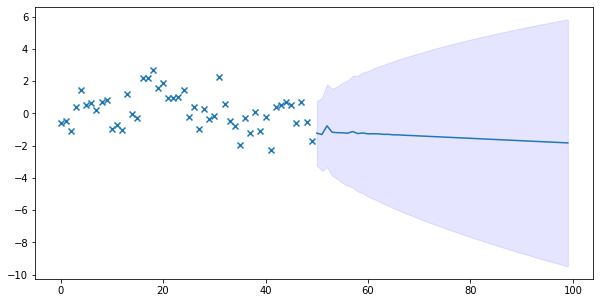

array([-1.22280827, -1.30646658, -0.77063576, -1.16680154, -1.19355406,
       -1.2012695 , -1.22658648, -1.12528445, -1.24831017, -1.21156267,
       -1.26565873, -1.25867147, -1.2657175 , -1.29845297, -1.29715601,
       -1.32835363, -1.33066106, -1.35124933, -1.36507373, -1.37858014,
       -1.39676771, -1.40802532, -1.42579034, -1.43886117, -1.45469628,
       -1.46955984, -1.48400784, -1.49958819, -1.51386323, -1.52929323,
       -1.54391237, -1.55894545, -1.57389112, -1.58870845, -1.6037618 ,
       -1.61856476, -1.63357115, -1.64844607, -1.66338039, -1.67831271,
       -1.69321158, -1.70815811, -1.72305851, -1.73799416, -1.7529089 ,
       -1.76783127, -1.78275576, -1.79767262, -1.81259882, -1.82751666])

In [62]:
# Mean reverting.
study_prophet(gen_series(np.array([.5, 0]), np.array([0, 0]), size=50), 
              show_components=True)